In [30]:
!pip install tabulate
import ast
import pandas as pd
from matplotlib import pyplot as plt
from tabulate import tabulate
import seaborn as sns


In [31]:
with open('output/ether_category_status_time.txt', 'r') as file:
    contents = file.readlines()

df = pd.DataFrame(eval(contents[0]))
df[['Type', 'Status','Month/Year']] = pd.DataFrame(df[0].tolist(), index= df.index)
df = df.iloc[:, 1:]
df = df.rename(columns={1: 'Value'})
ether_val = df.pop('Value') 
df.insert(3, 'Value', ether_val)
df.head()


,Type,Status,Month/Year,Value
0,Scamming,Active,06/2018,4.184234e+19
1,Phishing,Active,06/2018,2.508637e+20
2,Scamming,Offline,03/2018,3.055603e+21
3,Scamming,Offline,06/2017,8.633410e+18
4,Phishing,Active,11/2017,8.589770e+18


In [34]:
df_active=df[df['Status'] == 'Active']
df_active_sorted=df_active.sort_values(by="Month/Year", key=lambda x: pd.to_datetime(x, format="%m/%Y"))

df_inactive=df[df['Status'] == 'Inactive']
df_inactive_sorted=df_inactive.sort_values(by="Month/Year", key=lambda x: pd.to_datetime(x, format="%m/%Y"))

df_suspended=df[df['Status'] == 'Suspended']
df_suspended_sorted=df_suspended.sort_values(by="Month/Year", key=lambda x: pd.to_datetime(x, format="%m/%Y"))

df_offline=df[df['Status'] == 'Offline']
df_offline_sorted=df_offline.sort_values(by="Month/Year", key=lambda x: pd.to_datetime(x, format="%m/%Y"))


import sys

with open('output/popular_active_scams.md', 'w') as f:
    sys.stdout = f
    print(tabulate(df_active_sorted, headers='keys', tablefmt="github", showindex=False))
    sys.stdout = sys.__stdout__

with open('output/popular_inactive_scams.md', 'w') as f:
    sys.stdout = f
    print(tabulate(df_inactive_sorted, headers='keys', tablefmt="github", showindex=False))
    sys.stdout = sys.__stdout__
    
with open('output/popular_offline_scams.md', 'w') as f:
    sys.stdout = f
    print(tabulate(df_offline_sorted, headers='keys', tablefmt="github", showindex=False))
    sys.stdout = sys.__stdout__
    
with open('output/popular_suspended_scams.md', 'w') as f:
    sys.stdout = f
    print(tabulate(df_suspended_sorted, headers='keys', tablefmt="github", showindex=False))
    sys.stdout = sys.__stdout__


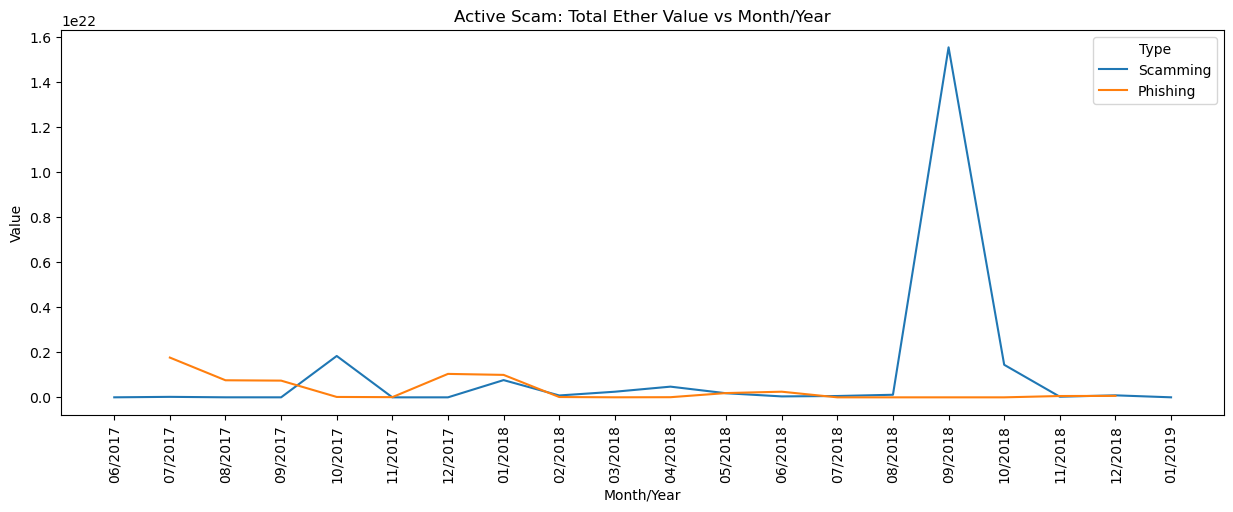

In [33]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Month/Year', y='Value', hue='Type', data=df_active_sorted)

# add labels and title
plt.xlabel('Month/Year')
plt.ylabel('Value')
plt.title('Active Scam: Total Ether Value vs Month/Year')
plt.xticks(rotation=90)
plt.savefig('output/active_scam.png',  bbox_inches='tight')
plt.show()

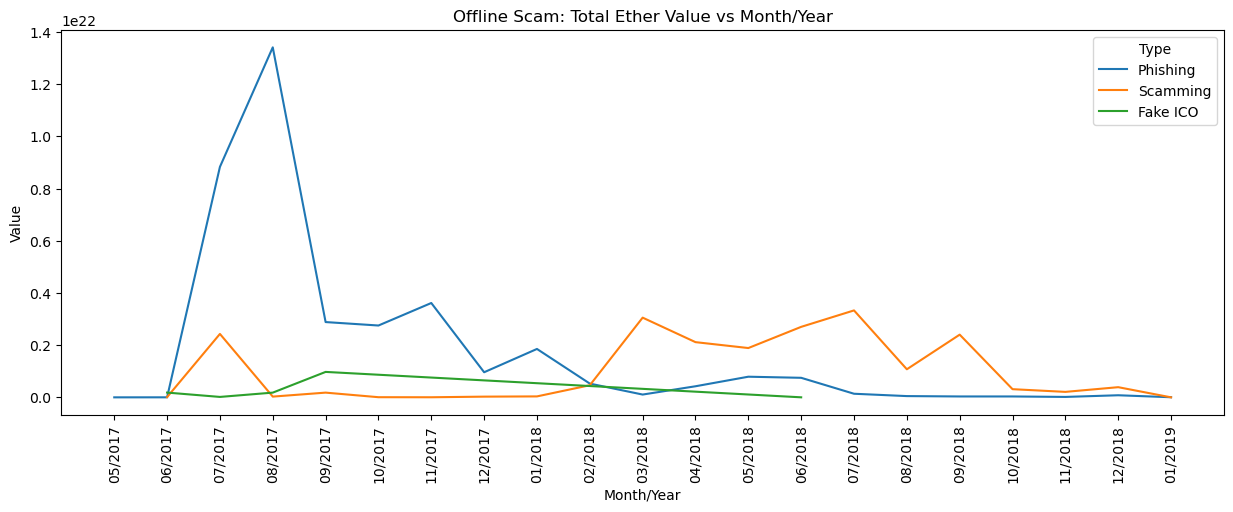

In [26]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Month/Year', y='Value', hue='Type', data=df_offline_sorted)

# add labels and title
plt.xlabel('Month/Year')
plt.ylabel('Value')
plt.title('Offline Scam: Total Ether Value vs Month/Year')
plt.xticks(rotation=90)
plt.savefig('output/offline_scam.png',  bbox_inches='tight')
plt.show()

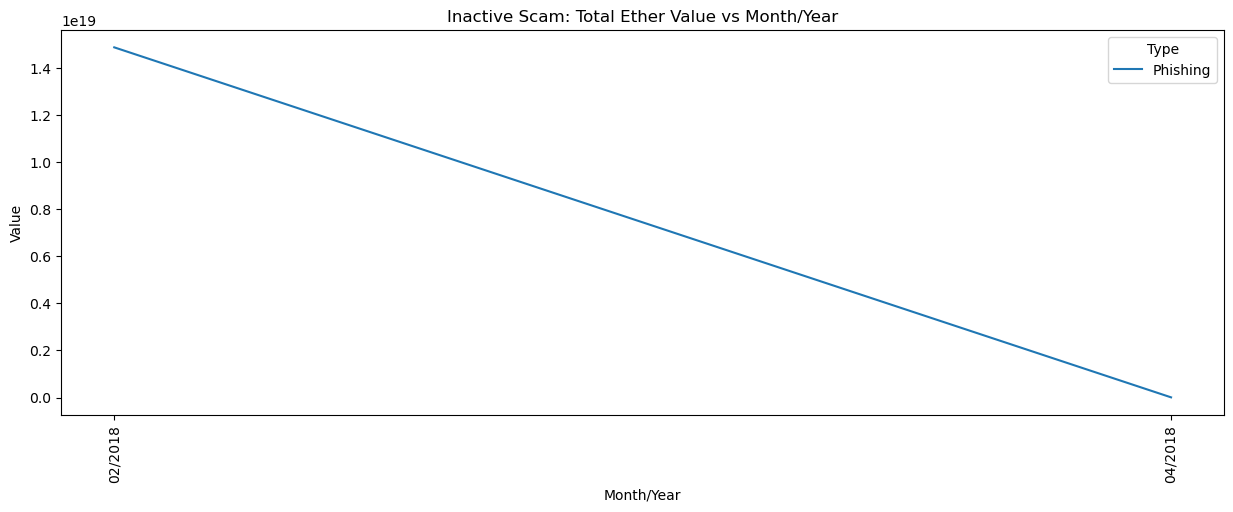

In [27]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Month/Year', y='Value', hue='Type', data=df_inactive_sorted)

# add labels and title
plt.xlabel('Month/Year')
plt.ylabel('Value')
plt.title('Inactive Scam: Total Ether Value vs Month/Year')
plt.xticks(rotation=90)
plt.savefig('output/inactive_scam.png',  bbox_inches='tight')
plt.show()

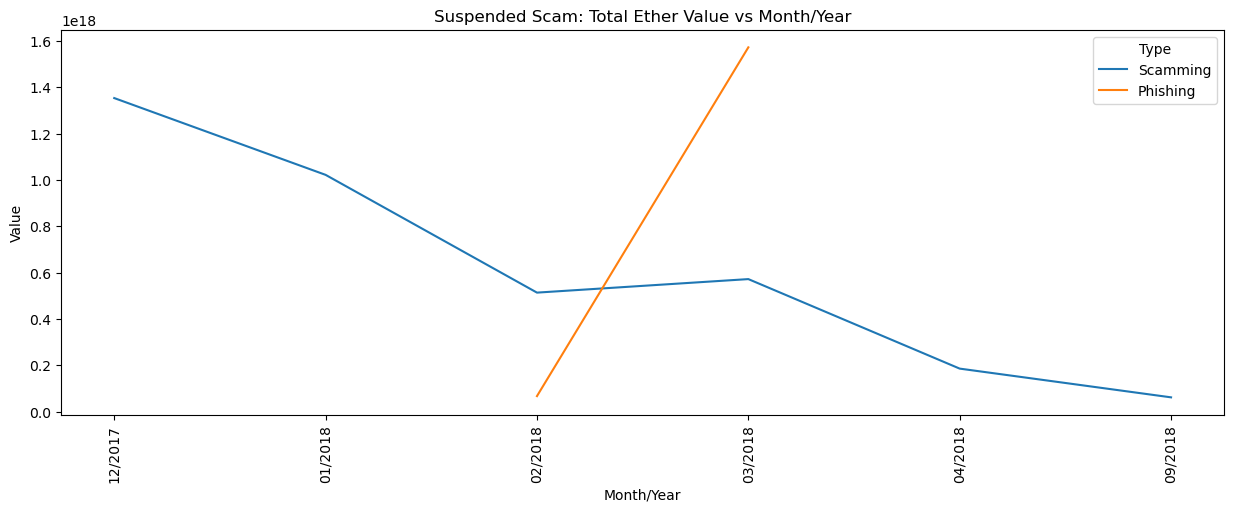

In [21]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Month/Year', y='Value', hue='Type', data=df_suspended_sorted)

# add labels and title
plt.xlabel('Month/Year')
plt.ylabel('Value')
plt.title('Suspended Scam: Total Ether Value vs Month/Year')
plt.xticks(rotation=90)
plt.savefig('output/suspended_scam.png',  bbox_inches='tight')
plt.show()